In [105]:
from google.colab import files
import pandas as pd


df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

df.head()


Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0

In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [107]:
df.describe()

Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000   
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000   
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000   
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000   

             Other  
count  1898.000000  
mean     43.390411  
std      41.746882  
min       0.000000  
25%      14.000000  
50%      40.000000  
75%      68.000000  
max    1105.000000

PREPROCESSING

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
df.info()

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Date']) # Drop rows with missing date immediately after conversion
df = df.sort_values('Date') # Sort by date
df = df.set_index('Date') # Set 'Date' as the index


# Check for missing numeric values
print("\nMissing values per column:\n", df.isna().sum())

df = df.fillna(method='ffill')

# Confirm cleaning
df.info()

df.head()

Shape of dataset: (1918, 7)

Columns: ['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB

Missing values per column:
 Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dt

Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
2019-07-01        15987        9962           407        21223    3715    NaN
2019-07-02        16895       10656           409        21715    3993    NaN
2019-07-03        16613       10658           427        22025    3638    NaN
2019-07-04        16604       10445           437        21868    3576    NaN
2019-07-05        16040       10532           400        20697    2856    NaN

Exploratory Data Analysis

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

print("Data Summary:")
display(df.describe())

# Check missing values
print("\nMissing values per column:")
display(df.isna().sum())

# Fill missing
df = df.fillna(method='ffill')

# Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if found
df = df.drop_duplicates()

# Data types check
print("\nData Types:")
print(df.dtypes)


Data Summary:


Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000   
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000   
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000   
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000   

             Other  
count  1918.000000  
mean     43.514599  
std      41.742417  
min       0.000000  
25%      14.250000  
50%      40.000000  
75%      68.000000  
max    1105.000000


Missing values per column:


Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


Duplicate rows: 0

Data Types:
Local Route       int64
Light Rail        int64
Peak Service      int64
Rapid Route       int64
School            int64
Other           float64
dtype: object


Trend Analysis

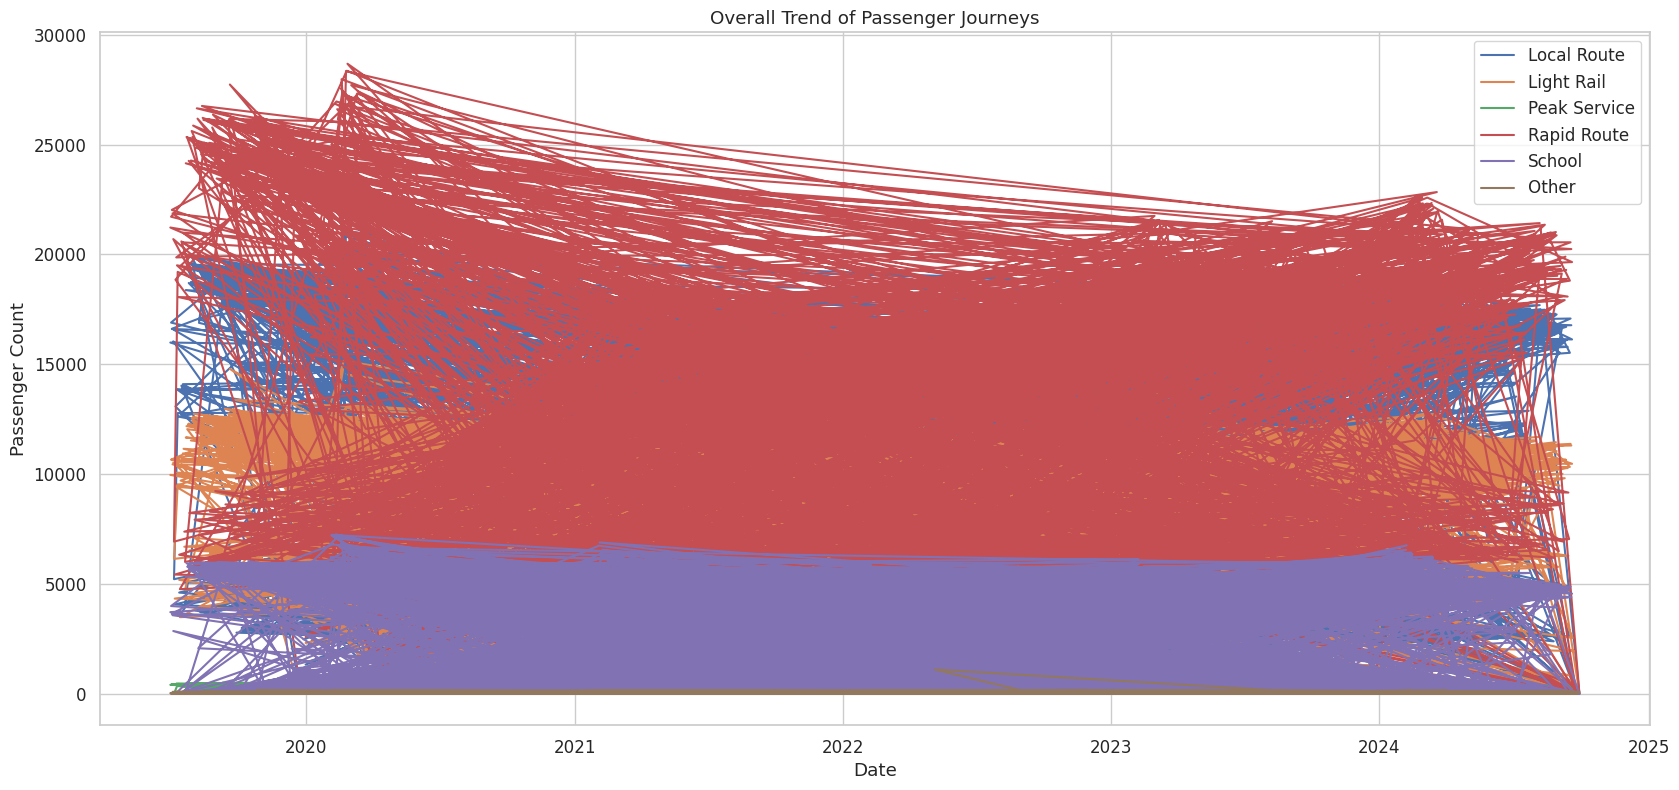

In [95]:
plt.figure(figsize=(20,9))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title("Overall Trend of Passenger Journeys")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()


*Seasonality Check*

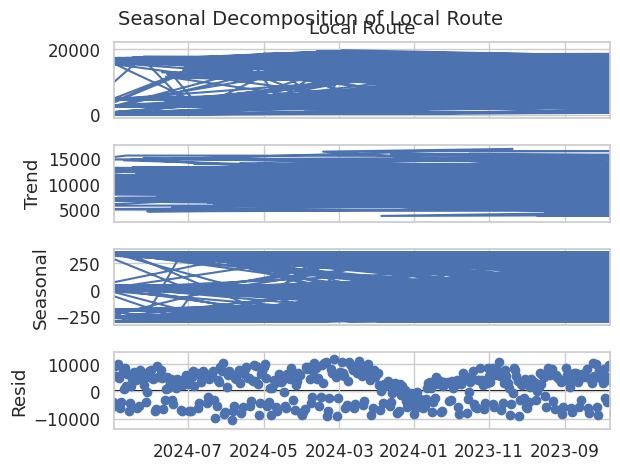

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose


service = 'Local Route'  # column name — ANY
result = seasonal_decompose(df[service], model='additive', period=7)
result.plot()
plt.suptitle(f"Seasonal Decomposition of {service}", fontsize=14)
plt.show()


Outlier Detection

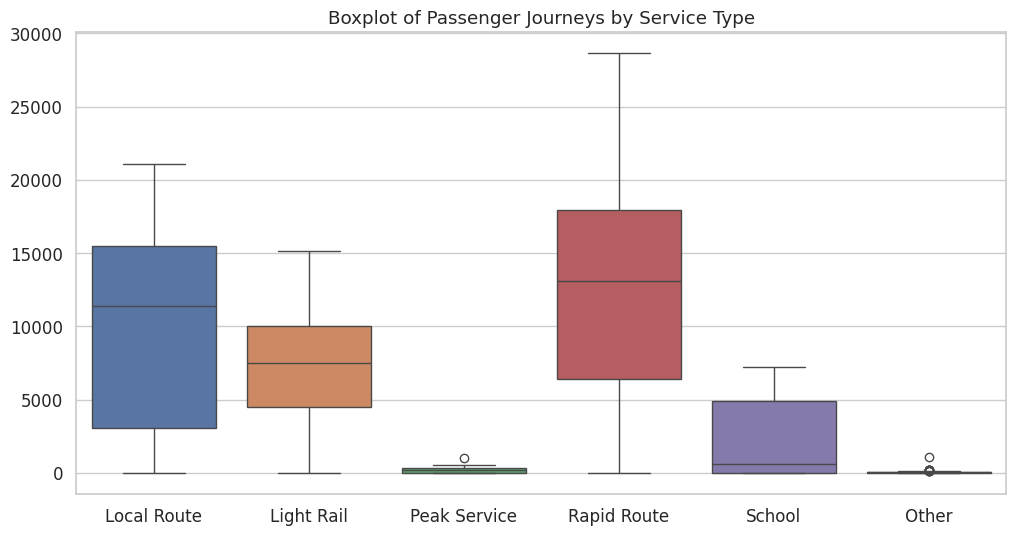

Number of Outliers per Column:
4


In [90]:
from scipy import stats

# Boxplot for each service type
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of Passenger Journeys by Service Type")
plt.show()

# Z-score method
z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3)
print("Number of Outliers per Column:")
print(outliers.sum())


**Correlation & Relationships**

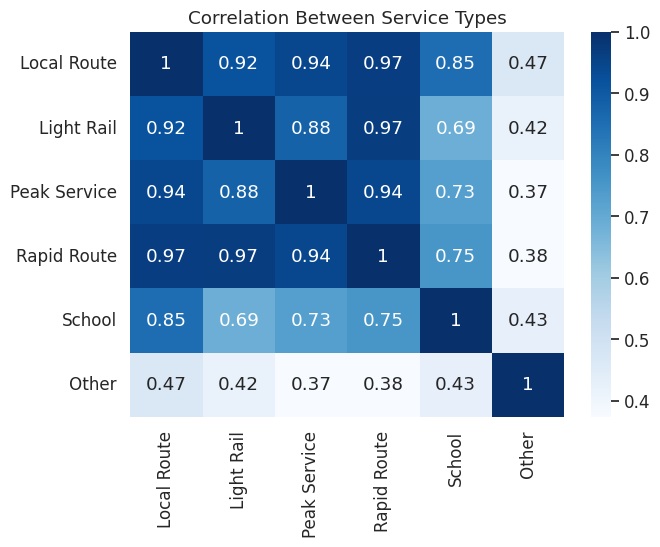

In [89]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Service Types")
plt.show()


**Time Series Fundamentals**

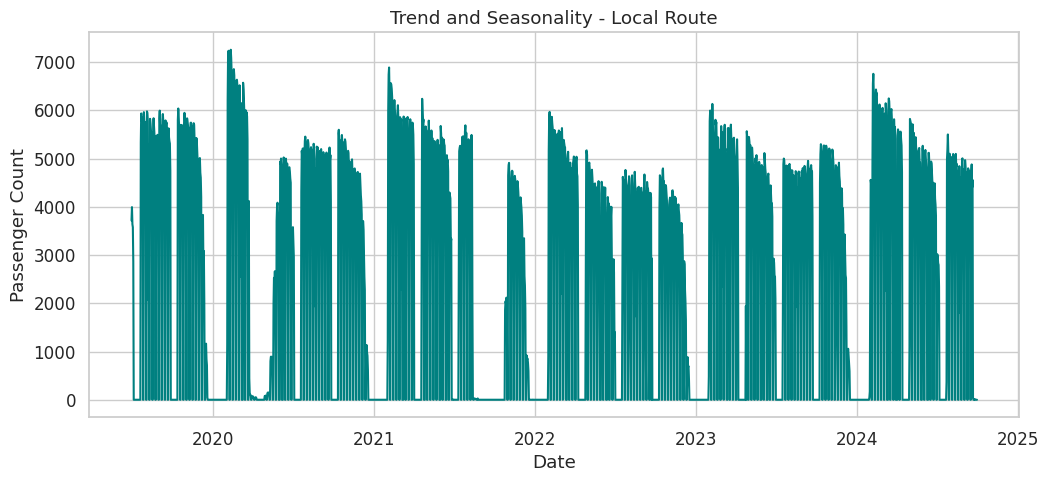

ADF Statistic: -7.133911909207525
p-value: 3.4605568058211924e-10
✅ The series is stationary.


In [88]:
from statsmodels.tsa.stattools import adfuller


service = 'Local Route'

# Plot the series
plt.figure(figsize=(12,5))
plt.plot(series, color='teal')
plt.title(f"Trend and Seasonality - {service}")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.show()

# Test for stationarity (ADF Test)
adf_result = adfuller(series.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("✅ The series is stationary.")
else:
    print("⚠️ The series is non-stationary — differencing required.")


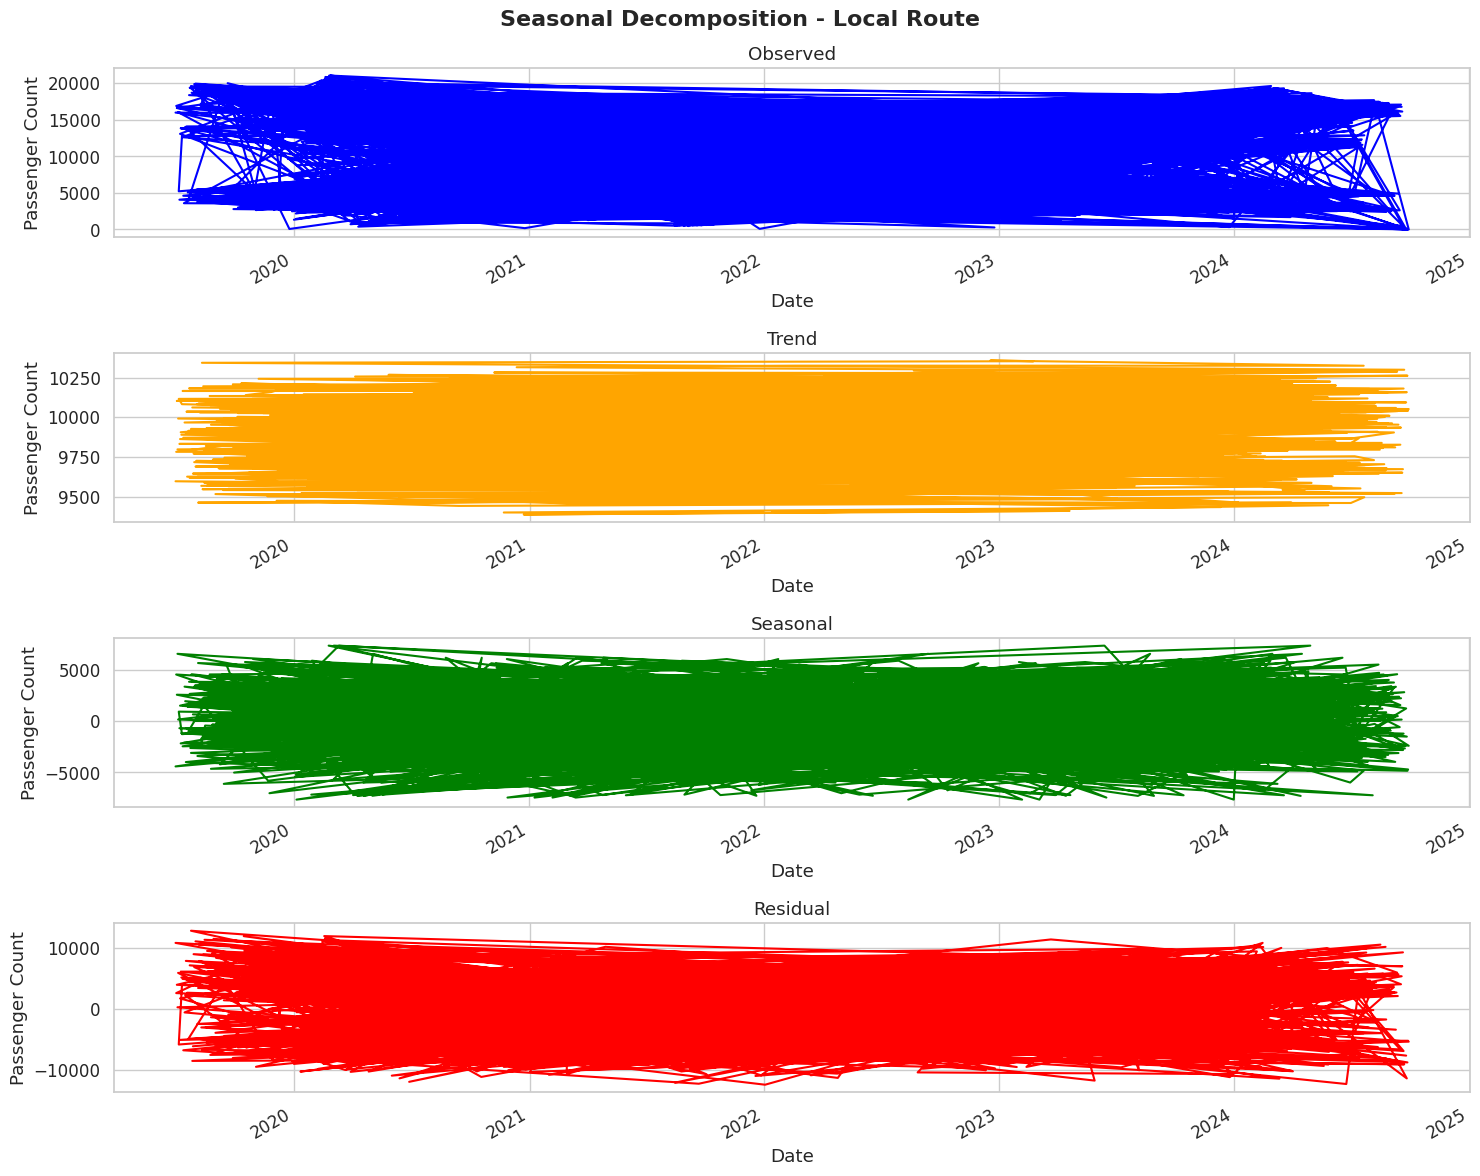

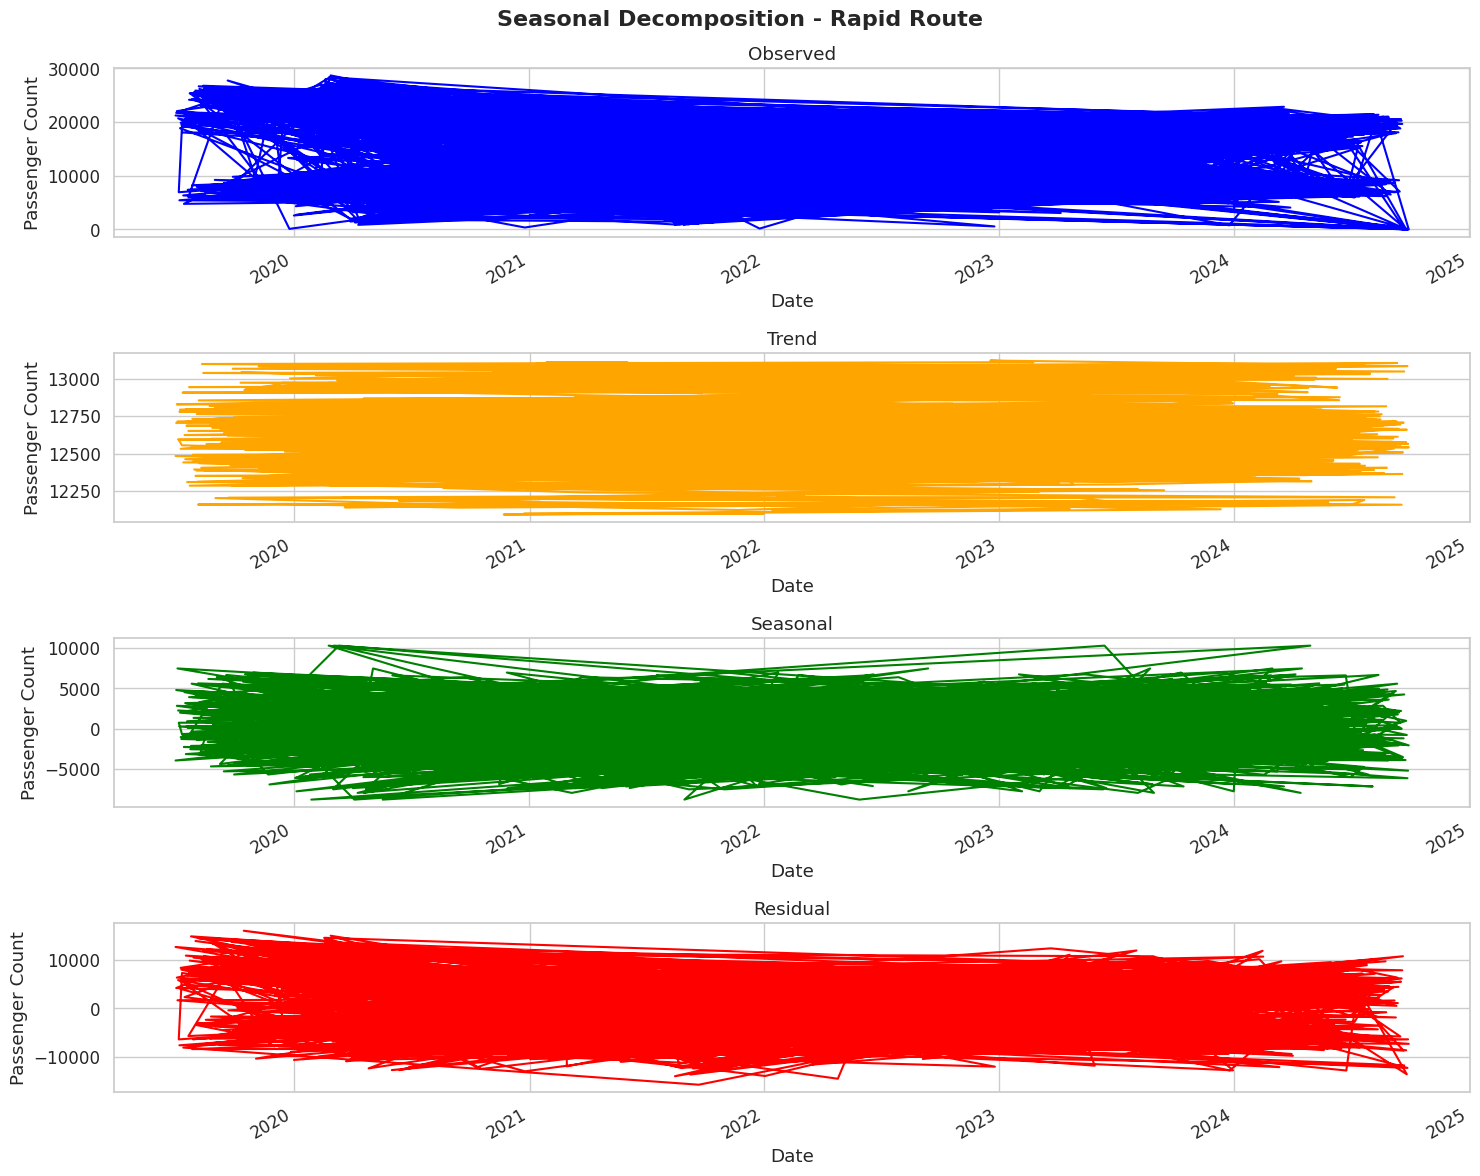

In [87]:
# Load and preprocess the dataframe
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True) # Added dayfirst=True
    df = df.dropna(subset=['Date'])
    df = df.set_index('Date')
    df = df.fillna(method='ffill')


except FileNotFoundError:
    print("Error: 'Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv' not found. Please upload the file or check the path.")
except Exception as e:
    print(f"An error occurred during data loading or preprocessing: {e}")


from statsmodels.tsa.seasonal import seasonal_decompose

#  Seasonal Decomposition for key services
def plot_seasonal_decomposition(series, title):
    """Plot seasonal decomposition of time series"""
    decomposition = seasonal_decompose(series, model='additive', period=365)

    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    fig.suptitle(f'Seasonal Decomposition - {title}', fontsize=16, fontweight='bold')

    decomposition.observed.plot(ax=axes[0], title='Observed', color='blue')
    decomposition.trend.plot(ax=axes[1], title='Trend', color='orange')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='green')
    decomposition.resid.plot(ax=axes[3], title='Residual', color='red')

    for ax in axes:
        ax.set_ylabel('Passenger Count')

    plt.tight_layout()
    plt.show()

if 'Local Route' in df.columns and 'Rapid Route' in df.columns:
    plot_seasonal_decomposition(df['Local Route'], 'Local Route')
    plot_seasonal_decomposition(df['Rapid Route'], 'Rapid Route')
else:
    print("Error: 'Local Route' or 'Rapid Route' columns not found in the DataFrame.")

*Key Insights*

In [86]:
# Step 9: Key Insights Generation

# Insight 1: Overall trends and patterns
print("=" * 60)
print("KEY INSIGHTS ANALYSIS")
print("=" * 60)

# Ensure 'Date' is a datetime index
if not isinstance(df.index, pd.DatetimeIndex):
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df = df.dropna(subset=['Date'])
        df = df.set_index('Date')
    else:
        print("Error: 'Date' column not found for setting index.")


# Insight 1: COVID-19 Impact Analysis
covid_period = df.loc[(df.index >= '2020-03-01') & (df.index <= '2021-06-30')]
pre_covid = df.loc[df.index < '2020-03-01']
post_covid = df.loc[df.index > '2021-06-30']

print("\n1. COVID-19 IMPACT ANALYSIS:")
if 'Local Route' in df.columns:
    print(f"   Pre-COVID average Local Route: {pre_covid['Local Route'].mean():.0f}")
    print(f"   During COVID average Local Route: {covid_period['Local Route'].mean():.0f}")
    print(f"   Post-COVID average Local Route: {post_covid['Local Route'].mean():.0f}")

    if not pre_covid.empty:
        print(f"   COVID impact: {((covid_period['Local Route'].mean() - pre_covid['Local Route'].mean()) / pre_covid['Local Route'].mean() * 100):.1f}%")
    else:
        print("   COVID impact: Not enough pre-COVID data to calculate impact.")
else:
    print("   'Local Route' column not found for COVID-19 impact analysis.")


# Insight 2: Service Type Dominance
service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
available_service_types = [s for s in service_types if s in df.columns]

if available_service_types:
    total_passengers = df[available_service_types].sum()
    dominant_service = total_passengers.idxmax()

    print(f"\n2. SERVICE TYPE DOMINANCE:")
    for service in available_service_types:
        percentage = (total_passengers[service] / total_passengers.sum()) * 100
        print(f"   {service}: {percentage:.1f}%")
    print(f"   Dominant Service: {dominant_service}")
else:
    print("\n2. SERVICE TYPE DOMINANCE: No service type columns found.")


# Insight 3: Seasonal Patterns
if 'Month' not in df.columns:
     df['Month'] = df.index.month

if available_service_types:
    monthly_avg = df.groupby('Month')[available_service_types].mean()

    print(f"\n3. SEASONAL PATTERNS:")
    if 'Local Route' in monthly_avg.columns:
        peak_month = monthly_avg['Local Route'].idxmax()
        low_month = monthly_avg['Local Route'].idxmin()
        print(f"   Peak month for Local Route: {peak_month} ({monthly_avg['Local Route'].max():.0f} avg passengers)")
        print(f"   Lowest month for Local Route: {low_month} ({monthly_avg['Local Route'].min():.0f} avg passengers)")
    else:
        print("   Seasonal patterns for Local Route cannot be calculated.")
else:
    print("\n3. SEASONAL PATTERNS: No service type columns found for analysis.")


# Insight 4: Weekend vs Weekday Patterns
if 'Weekend' not in df.columns:
    df['Weekend'] = (df.index.dayofweek >= 5).astype(int) # Monday=0, Sunday=6

if available_service_types and 'Weekend' in df.columns:
    weekday_avg = df[df['Weekend'] == 0][available_service_types].mean()
    weekend_avg = df[df['Weekend'] == 1][available_service_types].mean()

    print(f"\n4. WEEKDAY VS WEEKEND PATTERNS:")
    for service in ['Local Route', 'Rapid Route']:
        if service in weekday_avg.index and service in weekend_avg.index:
            # Add check to avoid division by zero if weekday_avg[service] is zero
            if weekday_avg[service] != 0:
                diff = ((weekday_avg[service] - weekend_avg[service]) / weekday_avg[service]) * 100
                print(f"   {service}: Weekdays {weekday_avg[service]:.0f} vs Weekends {weekend_avg[service]:.0f} ({diff:+.1f}% difference)")
            else:
                 print(f"   {service}: Weekdays {weekday_avg[service]:.0f} vs Weekends {weekend_avg[service]:.0f} (Cannot calculate percentage difference)")
        else:
            print(f"   Weekday vs Weekend patterns for {service} cannot be calculated.")
else:
    print("\n4. WEEKDAY VS WEEKEND PATTERNS: Required columns not found for analysis.")


# Insight 5: Growth Trends
if 'Year' not in df.columns:
    df['Year'] = df.index.year

if available_service_types and 'Year' in df.columns:
    yearly_totals = df.groupby('Year')[available_service_types].sum()

    print(f"\n5. YEARLY GROWTH TRENDS:")
    for service in ['Local Route', 'Rapid Route', 'Light Rail']:
        if service in yearly_totals.columns and len(yearly_totals) > 1:
            # Add check to avoid division by zero if yearly_totals[service].iloc[0] is zero
            if yearly_totals[service].iloc[0] != 0:
                growth = ((yearly_totals[service].iloc[-1] - yearly_totals[service].iloc[0]) / yearly_totals[service].iloc[0]) * 100
                print(f"   {service}: {growth:+.1f}% change from {yearly_totals.index[0]} to {yearly_totals.index[-1]}")
            else:
                 print(f"   {service}: Cannot calculate percentage change due to zero base value in {yearly_totals.index[0]}")
        else:
            print(f"   Yearly growth trends for {service} cannot be calculated.")
else:
     print("\n5. YEARLY GROWTH TRENDS: Required columns not found for analysis.")

KEY INSIGHTS ANALYSIS

1. COVID-19 IMPACT ANALYSIS:
   Pre-COVID average Local Route: 12762
   During COVID average Local Route: 8617
   Post-COVID average Local Route: 9824
   COVID impact: -32.5%

2. SERVICE TYPE DOMINANCE:
   Local Route: 30.7%
   Light Rail: 22.3%
   Peak Service: 0.6%
   Rapid Route: 39.0%
   School: 7.3%
   Other: 0.1%
   Dominant Service: Rapid Route

3. SEASONAL PATTERNS:
   Peak month for Local Route: 2 (12771 avg passengers)
   Lowest month for Local Route: 1 (7238 avg passengers)

4. WEEKDAY VS WEEKEND PATTERNS:
   Local Route: Weekdays 12755 vs Weekends 2732 (+78.6% difference)
   Rapid Route: Weekdays 15297 vs Weekends 5847 (+61.8% difference)

5. YEARLY GROWTH TRENDS:
   Local Route: +31.7% change from 2019 to 2024
   Rapid Route: +18.5% change from 2019 to 2024
   Light Rail: +33.2% change from 2019 to 2024


**Forecasting Methods**

SARIMA Model

Available services: ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

=== Local Route ===
MAE: 8751.55
RMSE: 10240.28
MAPE: nan%
R²: -284764.297


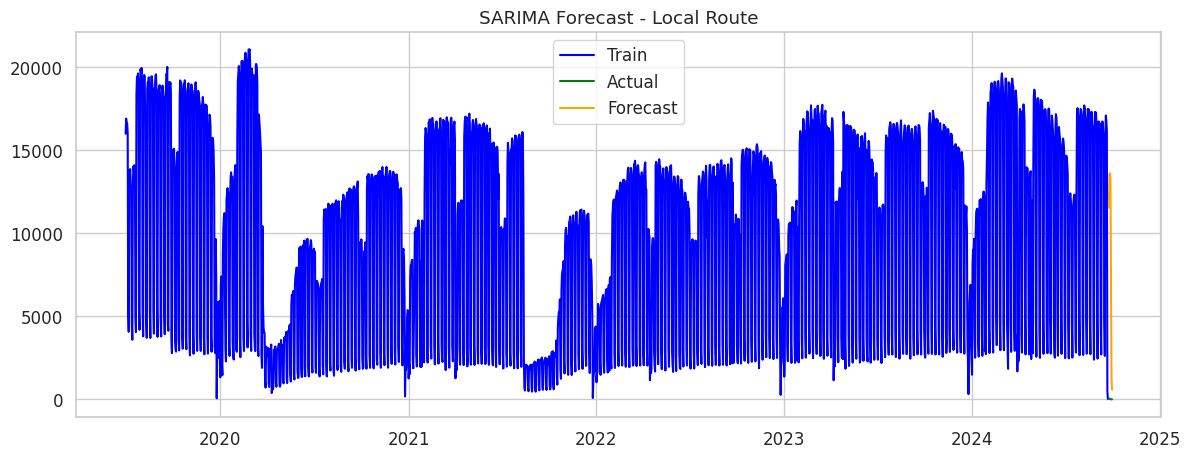


=== Light Rail ===
MAE: 5254.13
RMSE: 5945.19
MAPE: nan%
R²: -76.772


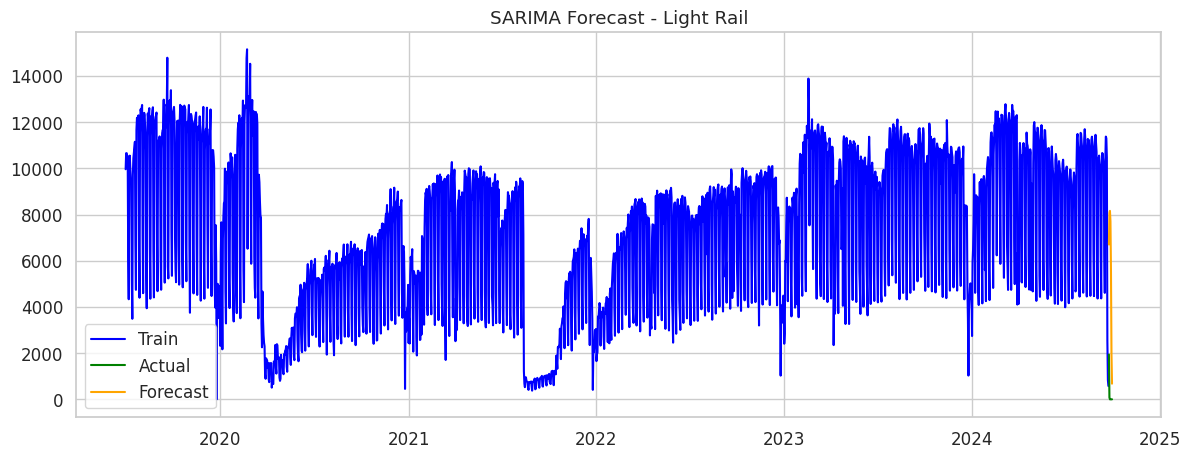


=== Peak Service ===
MAE: 210.12
RMSE: 248.85
MAPE: nan%
R²: -505719.702


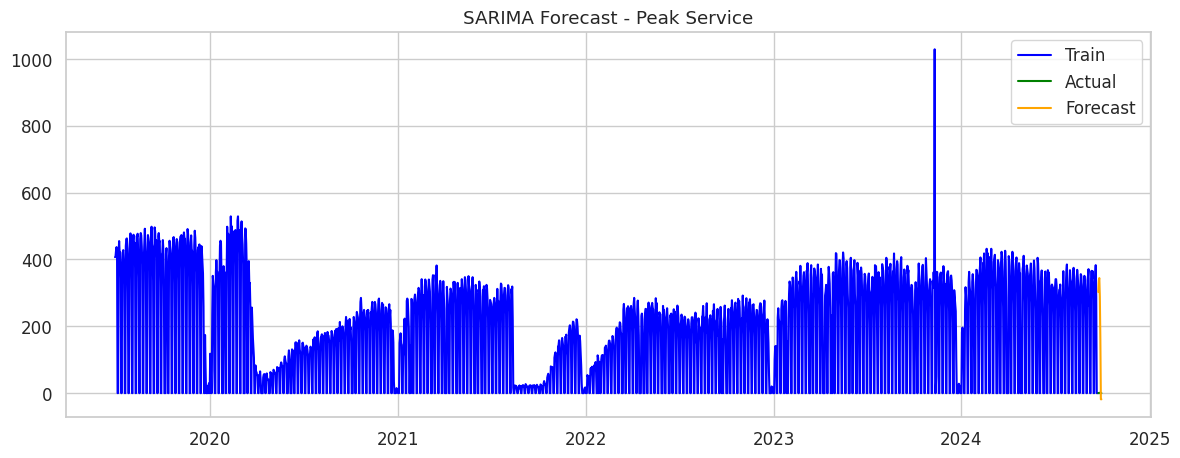


=== Rapid Route ===
MAE: 9542.19
RMSE: 11346.13
MAPE: nan%
R²: -278571.468


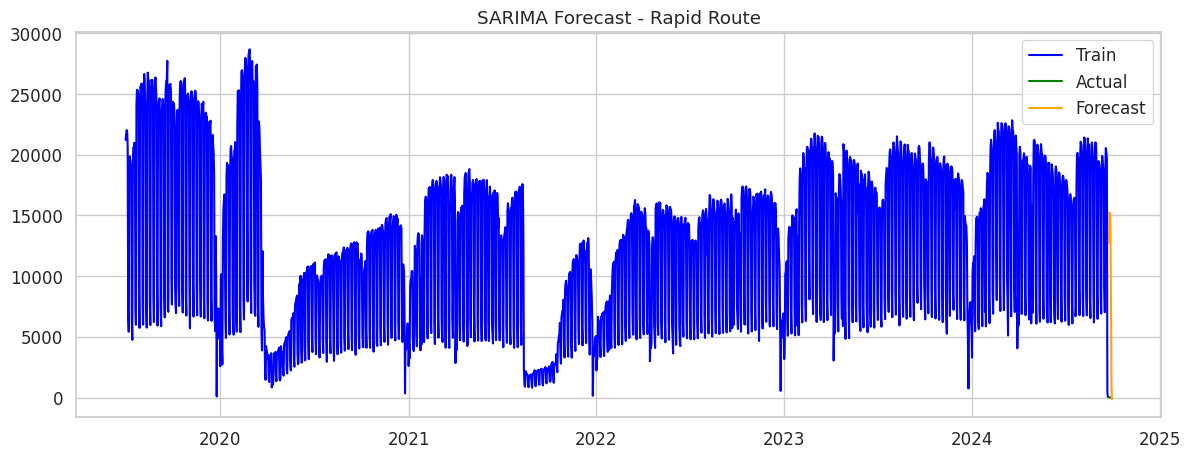


=== School ===
MAE: 2521.71
RMSE: 3063.37
MAPE: nan%
R²: -647645.488


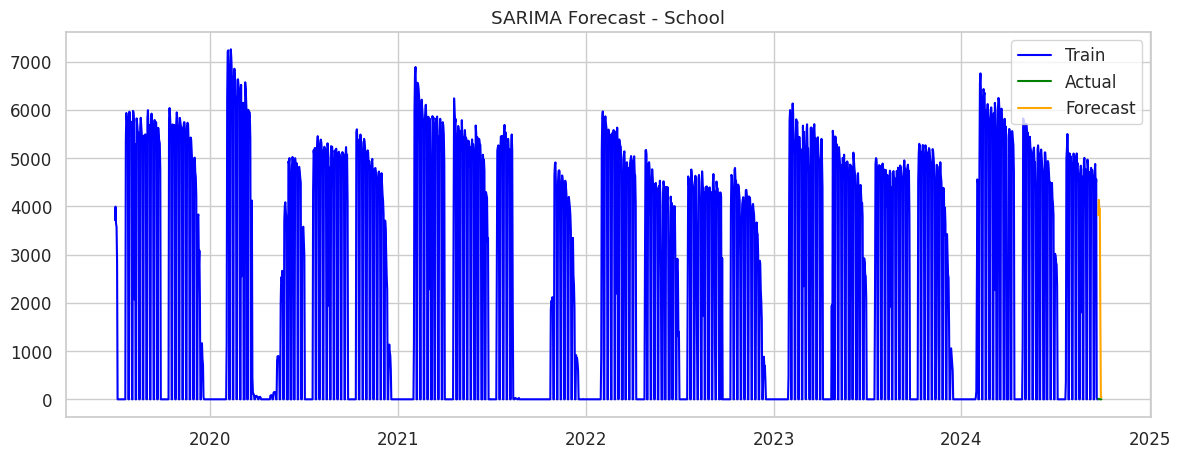

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

services = ["Local Route", "Light Rail", "Peak Service", "Rapid Route", "School"]
available_services = [s for s in services if s in df.columns]
print("Available services:", available_services)

def sarima_forecast(service):
    series = df[['Date', service]].dropna()
    series.set_index('Date', inplace=True)
    series = series.asfreq('D').fillna(method='ffill')

    # Split data
    train = series[:-7]
    test = series[-7:]

    # Model fitting
    model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
    sarima = model.fit(disp=False)

    # Forecast
    forecast = sarima.forecast(steps=7)

    # Metrics
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mape = np.mean(np.abs((test - forecast) / test)) * 100
    r2 = r2_score(test, forecast)


    print(f"\n=== {service} ===")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.3f}")


    plt.figure(figsize=(14,5))
    plt.plot(train.index, train, label='Train', color='blue')
    plt.plot(test.index, test, label='Actual', color='green')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.title(f"SARIMA Forecast - {service}")
    plt.legend()
    plt.grid(True)
    plt.show()

for s in available_services:
    sarima_forecast(s)


**Prophet**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

requested = ["Local Route", "Light Rail", "Peak Service", "Rapid Route", "School"]
available = [s for s in requested if s in df.columns]
print("Available requested services:", available)

results = {}

for service in available:
    df_prophet = df[[service]].reset_index()
    df_prophet.columns = ['ds', 'y']

    train = df_prophet[:-7]
    test = df_prophet[-7:]

    model = Prophet(weekly_seasonality=True, daily_seasonality=False)
    model.fit(train)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    pred = forecast.tail(7)['yhat'].values
    mae = mean_absolute_error(test['y'], pred)
    rmse = mean_squared_error(test['y'], pred, squared=False)
    mape = np.mean(np.abs((test['y'] - pred) / test['y'])) * 100

    results[service] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    plt.figure(figsize=(12,5))
    plt.plot(train['ds'], train['y'], label='Train')
    plt.plot(test['ds'], test['y'], label='Actual', color='blue')
    plt.plot(forecast['ds'].tail(7), forecast['yhat'].tail(7), label='Forecast', color='orange')
    plt.title(f"7-Day Forecast: {service}")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend()
    plt.show()

# Display evaluation metrics
pd.DataFrame(results).T

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

Multiple Forecasting Model

Training data: 1888 records
Testing data: 30 records


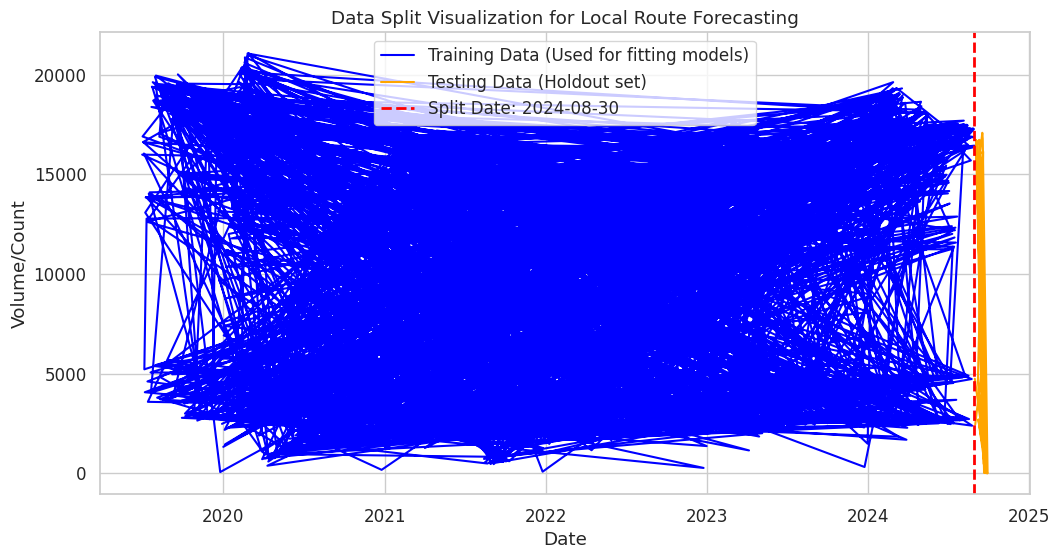

In [79]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


def calculate_metrics(y_true, y_pred):

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

# Features
feature_columns = ['Days', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos',
                  'Weekend', 'Local_Route_lag_1', 'Local_Route_lag_7', 'Local_Route_lag_30',
                  'Rapid_Route_lag_1', 'Rapid_Route_lag_7', 'Rapid_Route_lag_30']

# Target variables
target_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']


try:
    df_forecast = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

    df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
except FileNotFoundError:
    print("Error: 'your_forecasting_data.csv' not found. Please provide your data definition.")

    dates = pd.to_datetime(pd.date_range(start='2025-01-01', periods=100))
    df_forecast = pd.DataFrame({'Date': dates, 'Local Route': np.random.rand(100),
                                'Light Rail': np.random.rand(100), 'Peak Service': np.random.rand(100),
                                'Rapid Route': np.random.rand(100), 'School': np.random.rand(100),
                                'Days': range(100), 'Weekend': [x.dayofweek >= 5 for x in dates]})

    for col in feature_columns:
        if col not in df_forecast.columns:
            df_forecast[col] = np.random.rand(100)


# Split data (last 30 days for testing)
split_date = df_forecast['Date'].max() - timedelta(days=30)
train_data = df_forecast[df_forecast['Date'] <= split_date]
test_data = df_forecast[df_forecast['Date'] > split_date]

print(f"Training data: {train_data.shape[0]} records")
print(f"Testing data: {test_data.shape[0]} records")

plt.figure(figsize=(12, 6))

# Plot the main target variable across the entire history

plt.plot(train_data['Date'], train_data['Local Route'], label='Training Data (Used for fitting models)', color='blue')
plt.plot(test_data['Date'], test_data['Local Route'], label='Testing Data (Holdout set)', color='orange')

# Add a vertical line at the split date
plt.axvline(x=split_date, color='red', linestyle='--', lw=2, label=f'Split Date: {split_date.strftime("%Y-%m-%d")}')

plt.title(f'Data Split Visualization for Local Route Forecasting')
plt.xlabel('Date')
plt.ylabel('Volume/Count')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
# Create time-based features
df['day_of_week'] = df.index.day_name()
df['month'] = df.index.month

df['lag_1'] = df[service].shift(1)
df['lag_7'] = df[service].shift(7)


df['rolling_mean_7'] = df[service].rolling(window=7).mean()
df['rolling_std_7'] = df[service].rolling(window=7).std()

import holidays
ind_holidays = holidays.India(years=[2023, 2024, 2025])
df['is_holiday'] = df.index.isin(ind_holidays)

df.head(10)


Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
Date                                                                            
2019-07-01        15987        9962           407        21223    3715    NaN   
2019-07-02        16895       10656           409        21715    3993    NaN   
2019-07-03        16613       10658           427        22025    3638    NaN   
2019-07-04        16604       10445           437        21868    3576    NaN   
2019-07-05        16040       10532           400        20697    2856    NaN   
2019-07-06         5214        6141             0         6925       0    NaN   
2019-07-07         4065        4332             0         5426       0    NaN   
2019-07-08        13078        9442           422        18848       0    0.0   
2019-07-09        13835       10550           455        19862       0    1.0   
2019-07-10        13856       10066           421        19502       0    1.0   

            DayOfWeek  Days  Month_sin  Month_cos  ...  Rapid_Route_lag_1  \
Date                                               ...                      
2019-07-01     Monday     0       -0.5  -0.866025  ...                NaN   
2019-07-02    Tuesday     1       -0.5  -0.866025  ...            21223.0   
2019-07-03  Wednesday     2       -0.5  -0.866025  ...            21715.0   
2019-07-04   Thursday     3       -0.5  -0.866025  ...            22025.0   
2019-07-05     Friday     4       -0.5  -0.866025  ...            21868.0   
2019-07-06   Saturday     5       -0.5  -0.866025  ...            20697.0   
2019-07-07     Sunday     6       -0.5  -0.866025  ...             6925.0   
2019-07-08     Monday     7       -0.5  -0.866025  ...             5426.0   
2019-07-09    Tuesday     8       -0.5  -0.866025  ...            18848.0   
2019-07-10  Wednesday     9       -0.5  -0.866025  ...            19862.0   

            Rapid_Route_lag_7  Rapid_Route_lag_30  day_of_week  month   lag_1  \
Date                                                                            
2019-07-01                NaN                 NaN       Monday      7     NaN   
2019-07-02                NaN                 NaN      Tuesday      7  3715.0   
2019-07-03                NaN                 NaN    Wednesday      7  3993.0   
2019-07-04                NaN                 NaN     Thursday      7  3638.0   
2019-07-05                NaN                 NaN       Friday      7  3576.0   
2019-07-06                NaN                 NaN     Saturday      7  2856.0   
2019-07-07                NaN                 NaN       Sunday      7     0.0   
2019-07-08            21223.0                 NaN       Monday      7     0.0   
2019-07-09            21715.0                 NaN      Tuesday      7     0.0   
2019-07-10            22025.0                 NaN    Wednesday      7     0.0   

             lag_7  rolling_mean_7  rolling_std_7 is_holiday  
Date                                                          
2019-07-01     NaN             NaN            NaN      False  
2019-07-02     NaN             NaN            NaN      False  
2019-07-03     NaN             NaN            NaN      False  
2019-07-04     NaN             NaN            NaN      False  
2019-07-05     NaN             NaN            NaN      False  
2019-07-06     NaN             NaN            NaN      False  
2019-07-07     NaN     2539.714286    1768.888042      False  
2019-07-08  3715.0     2009.000000    1909.233616      False  
2019-07-09  3993.0     1438.571429    1811.681618      False  
2019-07-10  3638.0      918.857143    1582.952034      False  

[10 rows x 26 columns]

In [77]:
# Step 9: Model Performance Summary
print("\n" + "="*80)
print("🔍 MODEL PERFORMANCE SUMMARY (Test Set Evaluation)")
print("="*80)

performance_df = pd.DataFrame(model_performance).T
print("\nPerformance Metrics:")
print(performance_df.round(2))

print("\n📋 Performance Interpretation:")
print("-" * 50)
for service, metrics in model_performance.items():
    mape = metrics['MAPE']
    if mape < 10:
        rating = "Excellent"
    elif mape < 15:
        rating = "Good"
    elif mape < 20:
        rating = "Fair"
    else:
        rating = "Poor"
    print(f"{service:<15}: MAPE = {mape:.1f}% ({rating})")


🔍 MODEL PERFORMANCE SUMMARY (Test Set Evaluation)

Performance Metrics:
                  MAE     RMSE      MAPE
Local Route   3998.98  7124.75  43742.82
Light Rail    3054.90  4376.01       inf
Peak Service    70.01   136.20       inf
Rapid Route   5199.20  8819.97       inf
School        1278.79  1798.63       inf

📋 Performance Interpretation:
--------------------------------------------------
Local Route    : MAPE = 43742.8% (Poor)
Light Rail     : MAPE = inf% (Poor)
Peak Service   : MAPE = inf% (Poor)
Rapid Route    : MAPE = inf% (Poor)
School         : MAPE = inf% (Poor)


Train Models to  Make Forecasts

In [76]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

forecasts = {}
model_performance = {}

for target in target_columns:
    print(f"\nTraining model for: {target}")

    X_train = train_data[feature_columns]
    y_train = train_data[target]
    X_test = test_data[feature_columns]
    y_test = test_data[target]

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate metrics (assuming calculate_metrics is defined in a previous cell)
    mae, rmse, mape = calculate_metrics(y_test, y_pred)

    forecasts[target] = {
        'actual': y_test.values,
        'predicted': y_pred,
        'model': model # Store the trained model
    }
    model_performance[target] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

    print(f"  MAE: {mae:.0f}, RMSE: {rmse:.0f}, MAPE: {mape:.1f}%")

print("\nModel Performance Summary:")
import pandas as pd
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
display(performance_df)


Training model for: Local Route
  MAE: 3999, RMSE: 7125, MAPE: 43742.8%

Training model for: Light Rail
  MAE: 3055, RMSE: 4376, MAPE: inf%

Training model for: Peak Service
  MAE: 70, RMSE: 136, MAPE: inf%

Training model for: Rapid Route
  MAE: 5199, RMSE: 8820, MAPE: inf%

Training model for: School
  MAE: 1279, RMSE: 1799, MAPE: inf%

Model Performance Summary:


MAE         RMSE          MAPE
Local Route   3998.983667  7124.752206  4.374282e+04
Light Rail    3054.897333  4376.009373           inf
Peak Service    70.008000   136.195001           inf
Rapid Route   5199.200000  8819.965084           inf
School        1278.787333  1798.628587           inf

Training data: 1858 records
Testing data: 30 records


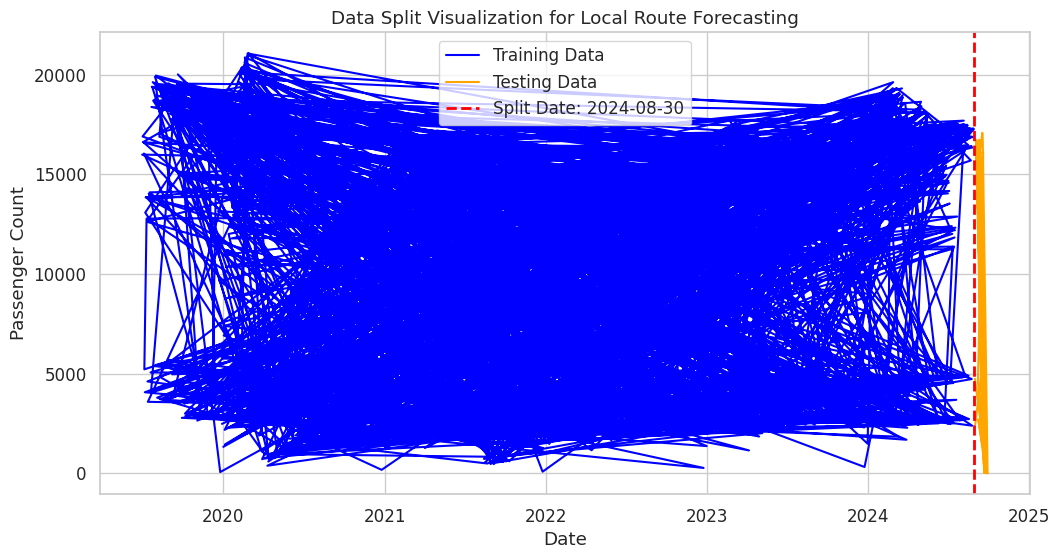


🔹 Training RandomForest for: Local Route


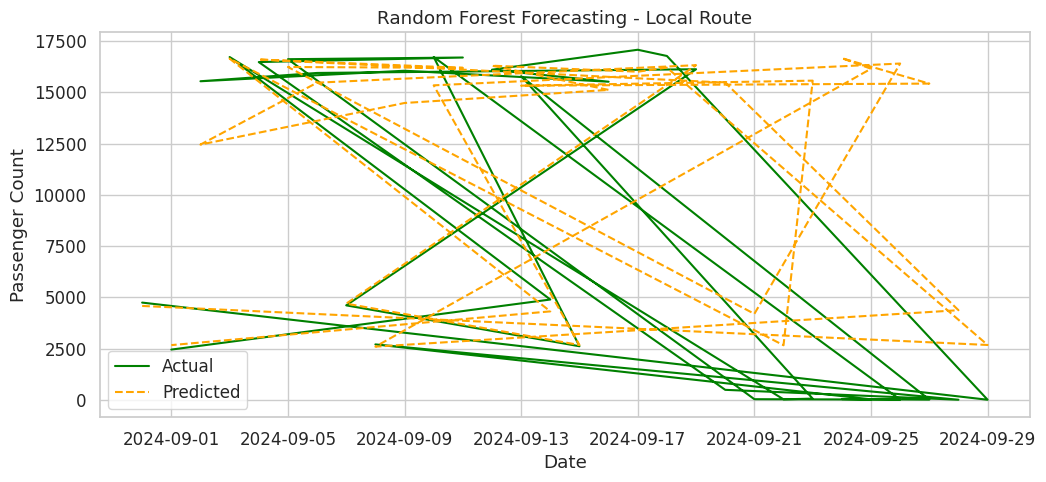


🔹 Training RandomForest for: Light Rail


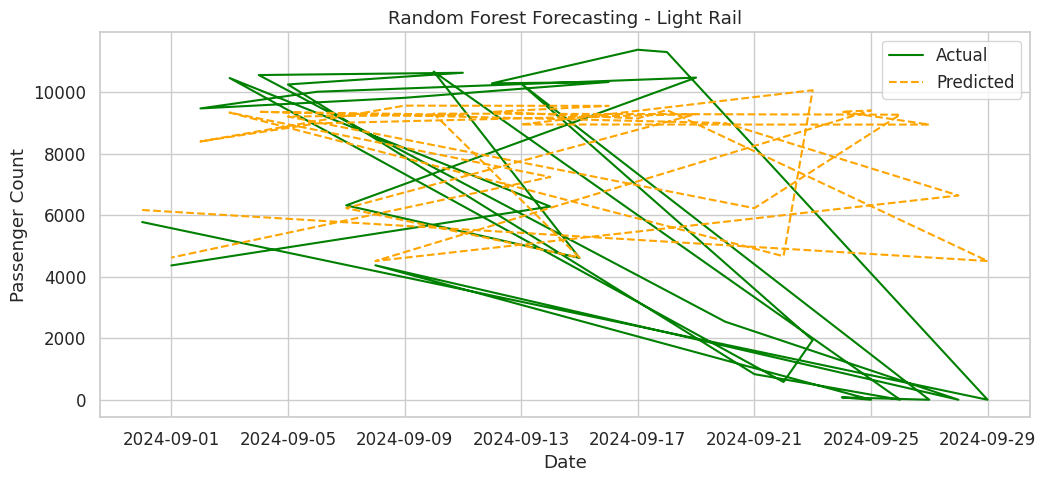


🔹 Training RandomForest for: Peak Service


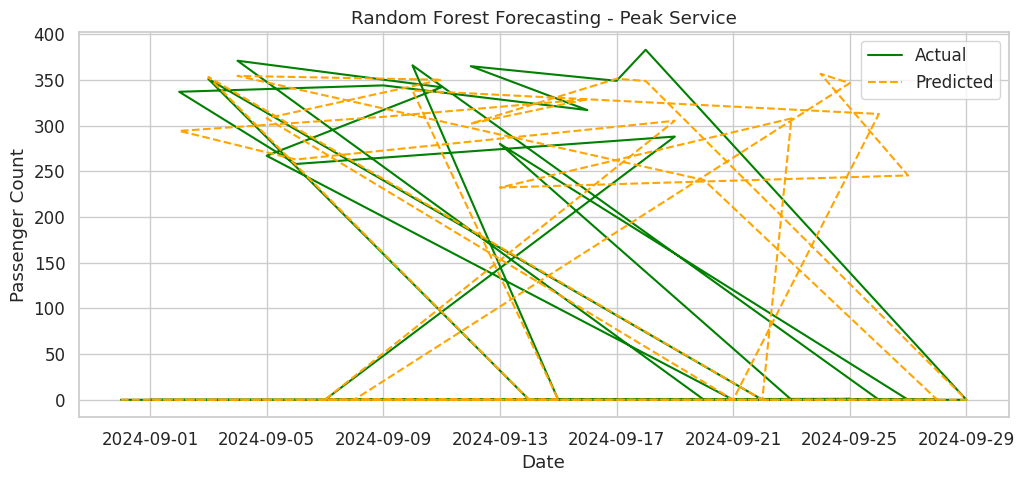


🔹 Training RandomForest for: Rapid Route


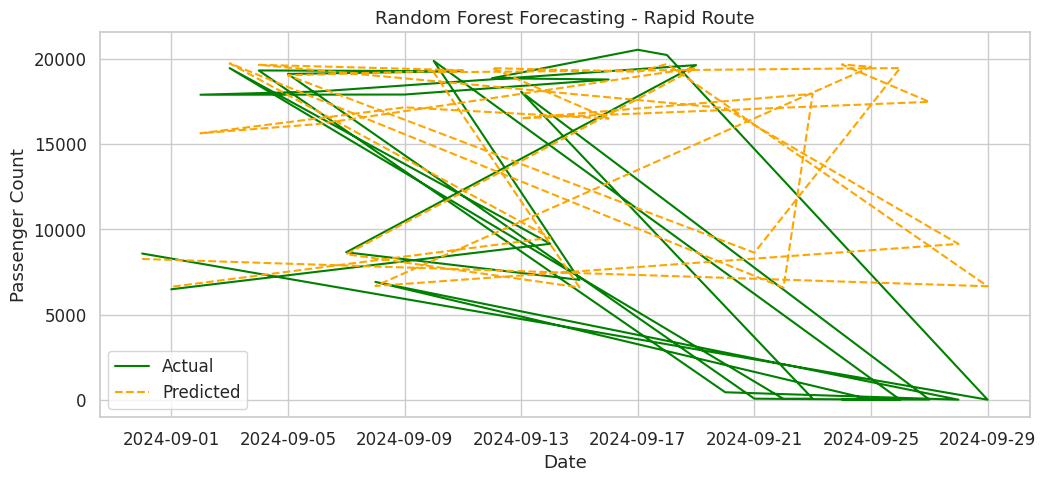


🔹 Training RandomForest for: School


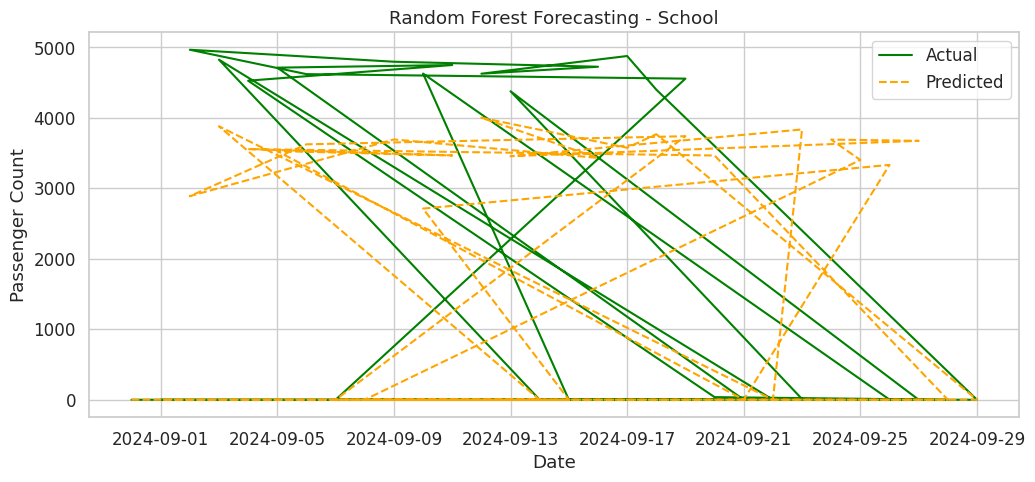


=== Model Performance Summary ===


Service          MAE         RMSE      MAPE (%)
0   Local Route  4021.900667  7249.310151  4.416467e+04
1    Light Rail  3024.154333  4405.582950           inf
2  Peak Service    72.083833   137.949224           inf
3   Rapid Route  5201.082833  8787.346289           inf
4        School  1247.162833  1797.094839           inf

In [75]:
# --- Import required libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import timedelta
import holidays # Import holidays


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Avoid division by zero for MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

feature_columns = [
    'Days', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Weekend',
    'Local_Route_lag_1', 'Local_Route_lag_7', 'Local_Route_lag_30',
    'Rapid_Route_lag_1', 'Rapid_Route_lag_7', 'Rapid_Route_lag_30'
]
target_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']


try:
    df_forecast = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')
    df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
except FileNotFoundError:
    print("Error: Dataset not found! Creating sample data for demonstration.")
    dates = pd.date_range(start='2025-01-01', periods=100)
    df_forecast = pd.DataFrame({
        'Date': dates,
        'Local Route': np.random.rand(100) * 1000,
        'Light Rail': np.random.rand(100) * 500,
        'Peak Service': np.random.rand(100) * 300,
        'Rapid Route': np.random.rand(100) * 400,
        'School': np.random.rand(100) * 200,
    })

# --- Feature Engineering ---
df_forecast['Days'] = (df_forecast['Date'] - df_forecast['Date'].min()).dt.days
df_forecast['Month_sin'] = np.sin(2 * np.pi * df_forecast['Date'].dt.month / 12)
df_forecast['Month_cos'] = np.cos(2 * np.pi * df_forecast['Date'].dt.month / 12)
df_forecast['DayOfWeek_sin'] = np.sin(2 * np.pi * df_forecast['Date'].dt.dayofweek / 7)
df_forecast['DayOfWeek_cos'] = np.cos(2 * np.pi * df_forecast['Date'].dt.dayofweek / 7)
df_forecast['Weekend'] = (df_forecast['Date'].dt.dayofweek >= 5).astype(int)

# Lag features for 'Local Route' and 'Rapid Route' - Ensure columns exist before creating lags
if 'Local Route' in df_forecast.columns:
    df_forecast['Local_Route_lag_1'] = df_forecast['Local Route'].shift(1)
    df_forecast['Local_Route_lag_7'] = df_forecast['Local Route'].shift(7)
    df_forecast['Local_Route_lag_30'] = df_forecast['Local Route'].shift(30)
if 'Rapid Route' in df_forecast.columns:
    df_forecast['Rapid_Route_lag_1'] = df_forecast['Rapid Route'].shift(1)
    df_forecast['Rapid_Route_lag_7'] = df_forecast['Rapid Route'].shift(7)
    df_forecast['Rapid_Route_lag_30'] = df_forecast['Rapid Route'].shift(30)

# Drop rows with NaN values created by lagging
df_forecast = df_forecast.dropna(subset=feature_columns)

split_date = df_forecast['Date'].max() - timedelta(days=30)
train_data = df_forecast[df_forecast['Date'] <= split_date].copy() # Use .copy() to avoid SettingWithCopyWarning
test_data = df_forecast[df_forecast['Date'] > split_date].copy()   # Use .copy() to avoid SettingWithCopyWarning

print(f"Training data: {train_data.shape[0]} records")
print(f"Testing data: {test_data.shape[0]} records")

# --- Visualize data split ---
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Local Route'], label='Training Data', color='blue')
plt.plot(test_data['Date'], test_data['Local Route'], label='Testing Data', color='orange')
plt.axvline(x=split_date, color='red', linestyle='--', lw=2, label=f'Split Date: {split_date.strftime("%Y-%m-%d")}')
plt.title('Data Split Visualization for Local Route Forecasting')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()

# --- Model training and evaluation ---
results = []
forecasts = {} # Initialize forecasts dictionary

for target in target_columns:
    print(f"\n🔹 Training RandomForest for: {target}")

    # Handle missing features - Filter feature_columns based on available columns after dropping NaNs
    available_features = [f for f in feature_columns if f in df_forecast.columns]
    X_train = train_data[available_features]
    y_train = train_data[target]
    X_test = test_data[available_features]
    y_test = test_data[target]

    # Fit Random Forest model
    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Compute metrics
    mae, rmse, mape = calculate_metrics(y_test, y_pred)
    results.append({'Service': target, 'MAE': mae, 'RMSE': rmse, 'MAPE (%)': mape})

    # Store model and predictions for forecasting later
    forecasts[target] = {
        'actual': y_test.values,
        'predicted': y_pred,
        'model': model # Store the trained model
    }

    # --- Plot actual vs predicted ---
    plt.figure(figsize=(12,5))
    plt.plot(test_data['Date'], y_test, label='Actual', color='green')
    plt.plot(test_data['Date'], y_pred, label='Predicted', color='orange', linestyle='--')
    plt.title(f"Random Forest Forecasting - {target}")
    plt.xlabel('Date')
    plt.ylabel('Passenger Count')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Display consolidated performance ---
results_df = pd.DataFrame(results)
print("\n=== Model Performance Summary ===")
display(results_df)

In [112]:
# Feature Engineering
import numpy as np

# Ensure the date is the index and is datetime type
if not isinstance(df.index, pd.DatetimeIndex):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['Date'])
    df = df.set_index('Date')

# Create time-based features
df['Days'] = (df.index - df.index.min()).days
df['Month_sin'] = np.sin(2 * np.pi * df.index.month / 12)
df['Month_cos'] = np.cos(2 * np.pi * df.index.month / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df.index.dayofweek / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df.index.dayofweek / 7)
df['Weekend'] = (df.index.dayofweek >= 5).astype(int)

# Lag features for 'Local Route' and 'Rapid Route'
df['Local_Route_lag_1'] = df['Local Route'].shift(1)
df['Local_Route_lag_7'] = df['Local Route'].shift(7)
df['Local_Route_lag_30'] = df['Local Route'].shift(30)
df['Rapid_Route_lag_1'] = df['Rapid Route'].shift(1)
df['Rapid_Route_lag_7'] = df['Rapid Route'].shift(7)
df['Rapid_Route_lag_30'] = df['Rapid Route'].shift(30)

# Drop rows with NaN values created by lagging
df_features = df.dropna()

display(df_features.head())

Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
Date                                                                            
2019-07-31        19599       12447           478        25342    5736    0.0   
2019-08-01        19950       12601           459        25864    5754    1.0   
2019-08-02        18953       12744           340        25010    5738    0.0   
2019-08-03         5447        7090             0         7922       0    0.0   
2019-08-04         3792        4595             0         6009       0    0.0   

            Days  Month_sin  Month_cos  DayOfWeek_sin  DayOfWeek_cos  Weekend  \
Date                                                                            
2019-07-31    30  -0.500000  -0.866025       0.974928      -0.222521        0   
2019-08-01    31  -0.866025  -0.500000       0.433884      -0.900969        0   
2019-08-02    32  -0.866025  -0.500000      -0.433884      -0.900969        0   
2019-08-03    33  -0.866025  -0.500000      -0.974928      -0.222521        1   
2019-08-04    34  -0.866025  -0.500000      -0.781831       0.623490        1   

            Local_Route_lag_1  Local_Route_lag_7  Local_Route_lag_30  \
Date                                                                   
2019-07-31            19887.0            19380.0             15987.0   
2019-08-01            19599.0            19619.0             16895.0   
2019-08-02            19950.0            18698.0             16613.0   
2019-08-03            18953.0             5383.0             16604.0   
2019-08-04             5447.0             4187.0             16040.0   

            Rapid_Route_lag_1  Rapid_Route_lag_7  Rapid_Route_lag_30  
Date                                                                  
2019-07-31            25617.0            25312.0             21223.0  
2019-08-01            25342.0            25284.0             21715.0  
2019-08-02            25864.0            24258.0             22025.0  
2019-08-03            25010.0             8231.0             21868.0  
2019-08-04             7922.0             5751.0             20697.0

NameError: name 'ts_df' is not defined

Generate 7-Day Forecast

In [70]:
def create_future_features(last_date, last_values, days=7):
    """Create feature set for future dates"""
    future_dates = [last_date + timedelta(days=i) for i in range(1, days+1)]

    future_data = []
    # Access last values for required lag features
    last_local_route = last_values.get('Local Route', 0) # Use .get with default 0 in case column is missing
    last_rapid_route = last_values.get('Rapid Route', 0) # Use .get with default 0 in case column is missing

    for i, date in enumerate(future_dates):
        features = {
            # 'Days' feature needs to be calculated based on the original minimum date
            'Days': (date - df_features.index.min()).days, # Use df_features.index.min()
            'Month_sin': np.sin(2 * np.pi * date.month/12),
            'Month_cos': np.cos(2 * np.pi * date.month/12),
            'DayOfWeek_sin': np.sin(2 * np.pi * date.weekday()/7),
            'DayOfWeek_cos': np.cos(2 * np.pi * date.weekday()/7),
            'Weekend': 1 if date.weekday() in [5, 6] else 0,
            # Simplified lag features for future dates
            'Local_Route_lag_1': last_local_route,
            'Local_Route_lag_7': last_local_route,  # Simplified
            'Local_Route_lag_30': last_local_route, # Simplified
            'Rapid_Route_lag_1': last_rapid_route,
            'Rapid_Route_lag_7': last_rapid_route,  # Simplified
            'Rapid_Route_lag_30': last_rapid_route   # Simplified
        }
        future_data.append(features)

    return pd.DataFrame(future_data), future_dates

last_date = df_features.index.max()
last_values = df_features.iloc[-1].to_dict() # Get the last row as a dictionary


future_features, future_dates = create_future_features(last_date, last_values, days=7)

# Generate forecasts
future_forecasts = {}
for target in target_columns:

    if target in forecasts and 'model' in forecasts[target]:
        model = forecasts[target]['model']
        future_forecasts[target] = model.predict(future_features[feature_columns])
    else:
        print(f"Warning: Model for {target} not found in forecasts. Skipping.")
        future_forecasts[target] = [np.nan] * 7 # Add NaNs if model not found


forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Local Route': future_forecasts.get('Local Route', [np.nan]*7), # Use .get with default NaN list
    'Light Rail': future_forecasts.get('Light Rail', [np.nan]*7),
    'Peak Service': future_forecasts.get('Peak Service', [np.nan]*7),
    'Rapid Route': future_forecasts.get('Rapid Route', [np.nan]*7),
    'School': future_forecasts.get('School', [np.nan]*7),
    # Use the mean from the original df DataFrame for 'Other'
    'Other': [df['Other'].mean()] * 7
})

print("7-DAY FORECAST RESULTS:")
print("=" * 80)
for i, row in forecast_df.iterrows():
    print(f"Date: {row['Date'].strftime('%Y-%m-%d')}")
    print(f"  Local Route: {row['Local Route']:.0f}" if not pd.isna(row['Local Route']) else "  Local Route: N/A")
    print(f"  Light Rail: {row['Light Rail']:.0f}" if not pd.isna(row['Light Rail']) else "  Light Rail: N/A")
    print(f"  Peak Service: {row['Peak Service']:.0f}" if not pd.isna(row['Peak Service']) else "  Peak Service: N/A")
    print(f"  Rapid Route: {row['Rapid Route']:.0f}" if not pd.isna(row['Rapid Route']) else "  Rapid Route: N/A")
    print(f"  School: {row['School']:.0f}" if not pd.isna(row['School']) else "  School: N/A")
    print("-" * 40)

7-DAY FORECAST RESULTS:
Date: 2024-09-30
  Local Route: 15020
  Light Rail: 9006
  Peak Service: 303
  Rapid Route: 16232
  School: 3317
----------------------------------------
Date: 2024-10-01
  Local Route: 13155
  Light Rail: 9141
  Peak Service: 350
  Rapid Route: 18646
  School: 4756
----------------------------------------
Date: 2024-10-02
  Local Route: 13142
  Light Rail: 9129
  Peak Service: 351
  Rapid Route: 18560
  School: 4720
----------------------------------------
Date: 2024-10-03
  Local Route: 12968
  Light Rail: 8955
  Peak Service: 282
  Rapid Route: 18170
  School: 4654
----------------------------------------
Date: 2024-10-04
  Local Route: 12408
  Light Rail: 8611
  Peak Service: 229
  Rapid Route: 16532
  School: 4566
----------------------------------------
Date: 2024-10-05
  Local Route: 4322
  Light Rail: 6566
  Peak Service: 0
  Rapid Route: 8887
  School: 0
----------------------------------------
Date: 2024-10-06
  Local Route: 2552
  Light Rail: 4586
  P

Visualize Forecast Results

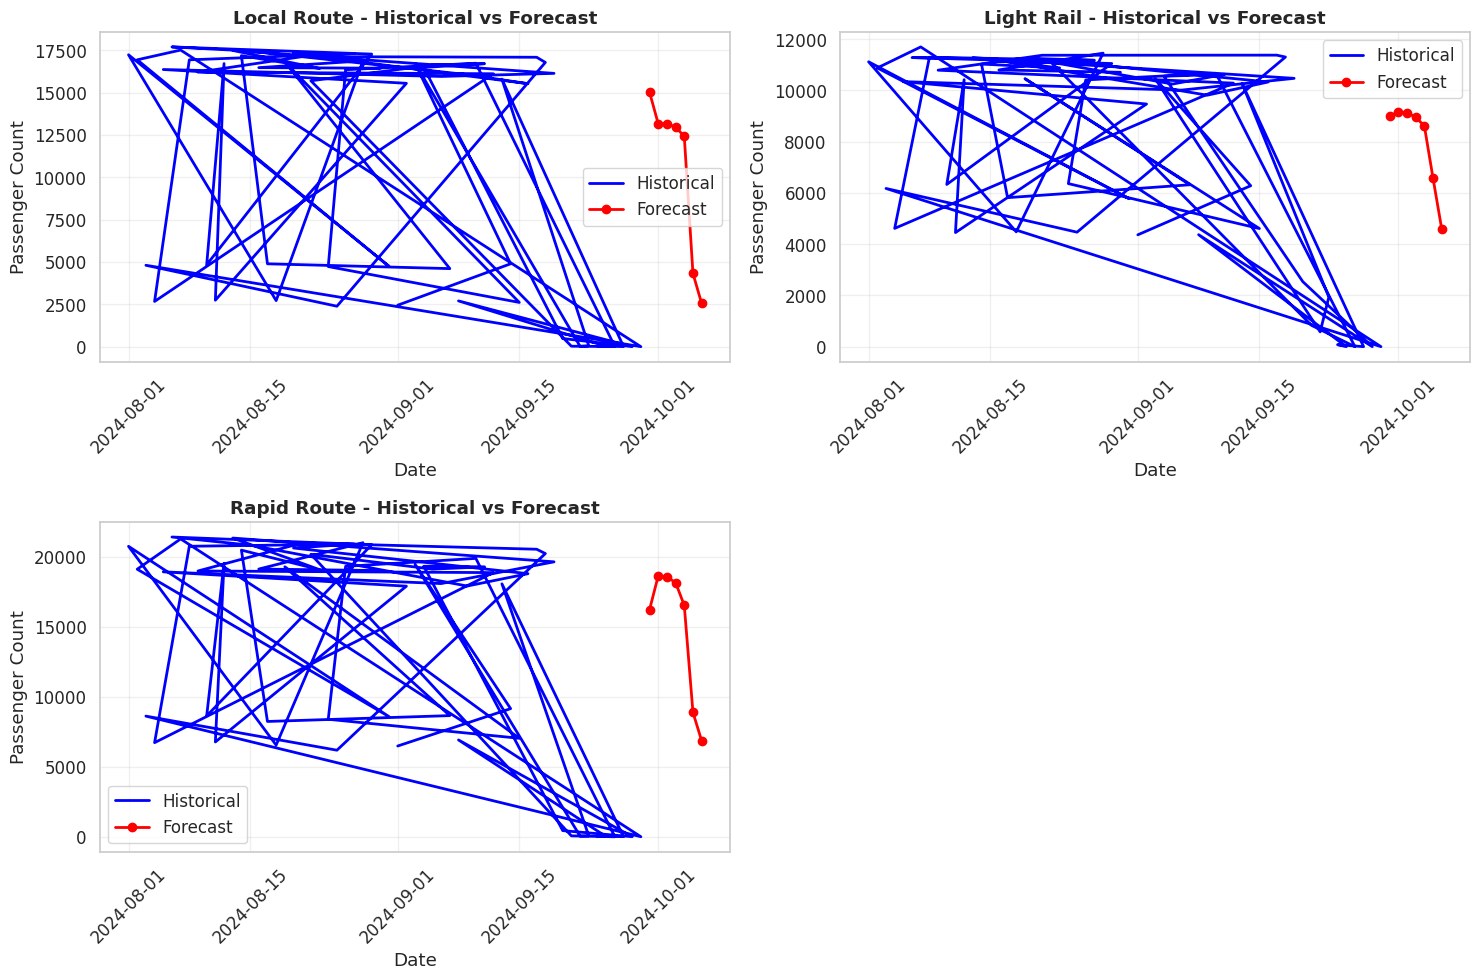


FORECAST SUMMARY (Next 7 Days):
        Local Route   Light Rail  Peak Service   Rapid Route       School
count      7.000000     7.000000      7.000000      7.000000     7.000000
mean   10509.695714  7999.301429    216.507143  14841.471429  3144.780000
std     4924.791676  1760.046663    153.650627   4886.420218  2205.339296
min     2552.500000  4586.350000      0.000000   6864.320000     0.240000
25%     8364.910000  7588.485000    114.730000  12559.105000  1658.530000
50%    12968.270000  8954.910000    281.610000  16532.220000  4566.240000
75%    13148.825000  9067.765000    326.575000  18364.965000  4686.880000
max    15019.630000  9141.350000    351.330000  18645.620000  4756.160000


In [69]:
#  Visualize Forecast Results
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

plt.figure(figsize=(15, 10))

key_services = ['Local Route', 'Light Rail', 'Rapid Route']

# Ensure df_forecast has 'Date' as a column for plotting
if isinstance(df_forecast.index, pd.DatetimeIndex):
    df_forecast.reset_index(inplace=True)

for i, service in enumerate(key_services, 1):
    plt.subplot(2, 2, i)

    # Historical data
    # Ensure last_date is defined and is a datetime object
    if 'last_date' in locals() and isinstance(last_date, pd.Timestamp):
         historical_cutoff = last_date - timedelta(days=60)
         # Filter historical data based on the 'Date' column
         historical_data = df_forecast[df_forecast['Date'] > historical_cutoff]

         plt.plot(historical_data['Date'], historical_data[service],
                  label='Historical', color='blue', linewidth=2)
    else:
         print("Warning: 'last_date' not found or not a datetime object. Cannot plot historical data.")


    # Ensure forecast_df has 'Date' as a column and the service column
    if 'forecast_df' in locals() and service in forecast_df.columns and 'Date' in forecast_df.columns:
        plt.plot(forecast_df['Date'], forecast_df[service],
                 label='Forecast', color='red', linewidth=2, marker='o')
    else:
        print(f"Warning: 'forecast_df' not found or missing '{service}' or 'Date' column. Cannot plot forecast data for {service}.")


    plt.title(f'{service} - Historical vs Forecast', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Passenger Count')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Display forecast summary (assuming forecast_df and target_columns are available)
if 'forecast_df' in locals() and 'target_columns' in locals():
    print("\nFORECAST SUMMARY (Next 7 Days):")
    print("=" * 60)
    summary_stats = forecast_df[target_columns].describe()
    print(summary_stats)
else:
    print("\nWarning: 'forecast_df' or 'target_columns' not found. Cannot display forecast summary.")

**Forecasting for the next 7 days**

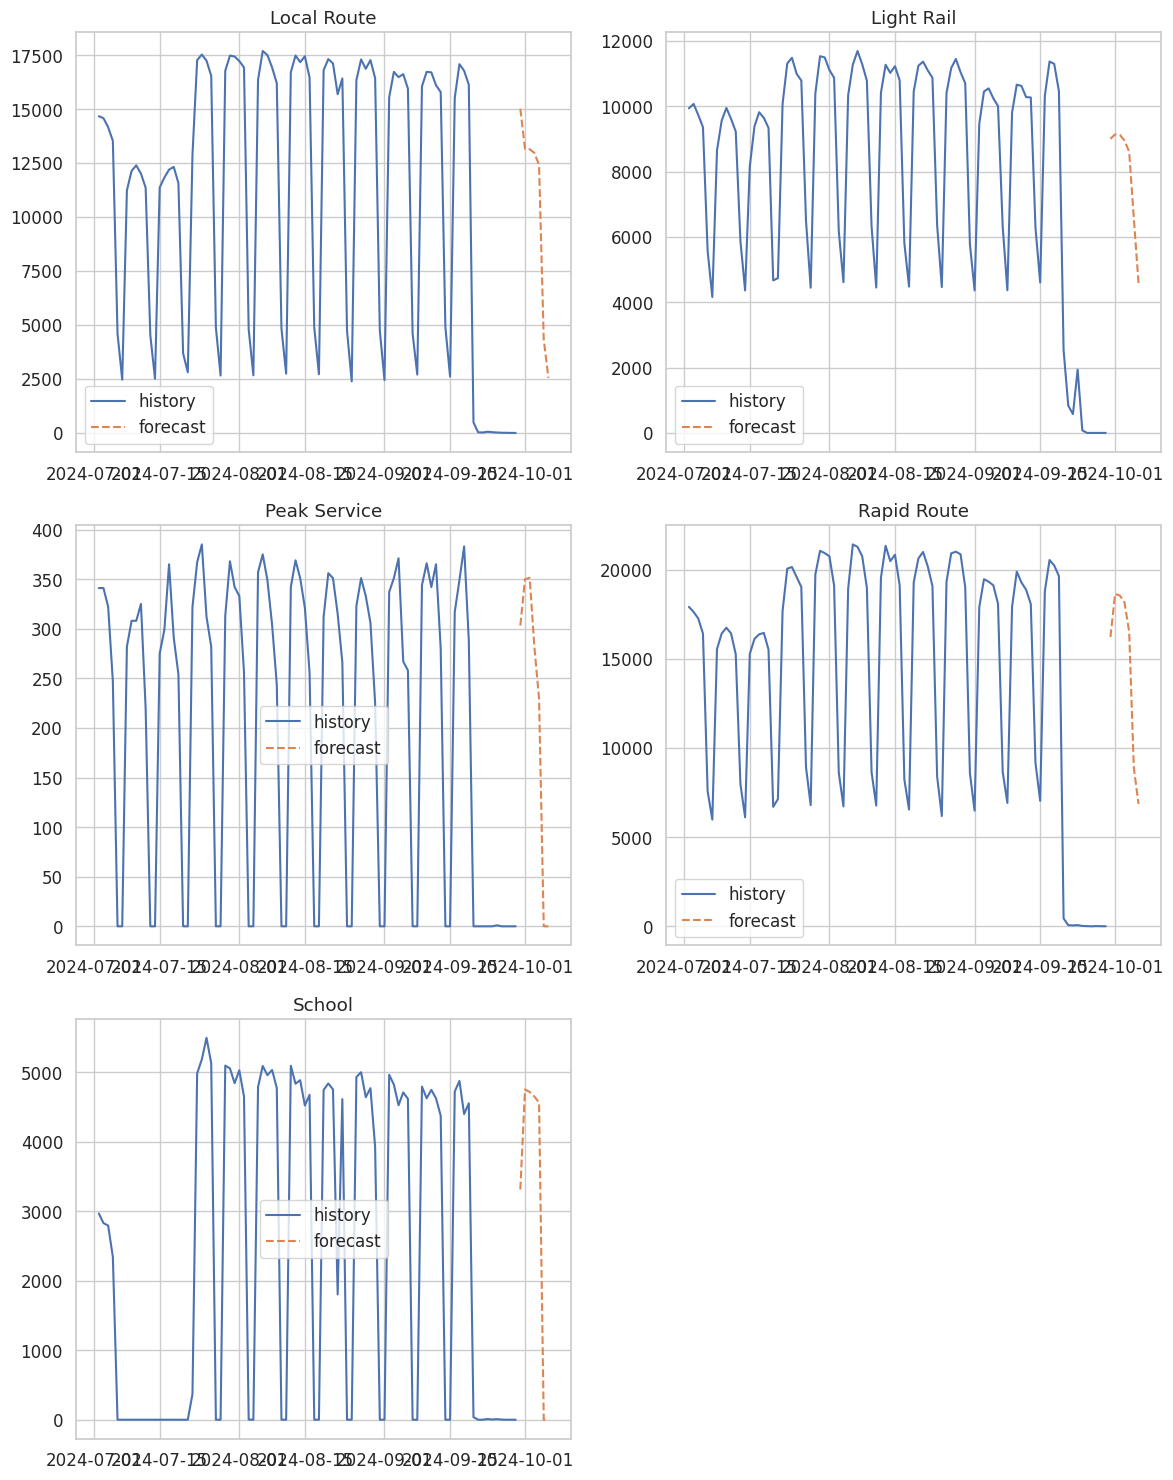

In [66]:
import matplotlib.pyplot as plt
import math
import os # Import the os module

os.makedirs('results', exist_ok=True)

results = []
for service, metrics in model_performance.items():
    results.append({
        'service': service,
        'chosen_model': 'RandomForestRegressor',
        'RMSE': metrics['RMSE'],
        'MAE': metrics['MAE'],
        'MAPE': metrics['MAPE']
    })

services = [r['service'] for r in results] if len(results)>0 else []
n = len(services)
cols = 2
rows = math.ceil(n/cols)
plt.figure(figsize=(12, 5*rows))
for i, svc in enumerate(services, 1):
    ax = plt.subplot(rows, cols, i)

    series = df[svc].asfreq('D').ffill()
    hist = series[-90:]
    plt.plot(hist.index, hist.values, label='history')
    try:

        if svc in forecast_df.columns:
             fut = forecast_df[['Date', svc]].rename(columns={svc: 'forecast'}).set_index('Date')
             plt.plot(fut.index, fut['forecast'], linestyle='--', label='forecast')
    except:
        pass
    plt.title(svc)
    plt.legend()
plt.tight_layout()
plt.savefig('results/all_forecasts_summary.png')
plt.show()

--

**FORECASTING INSIGHT DASHBOARD**

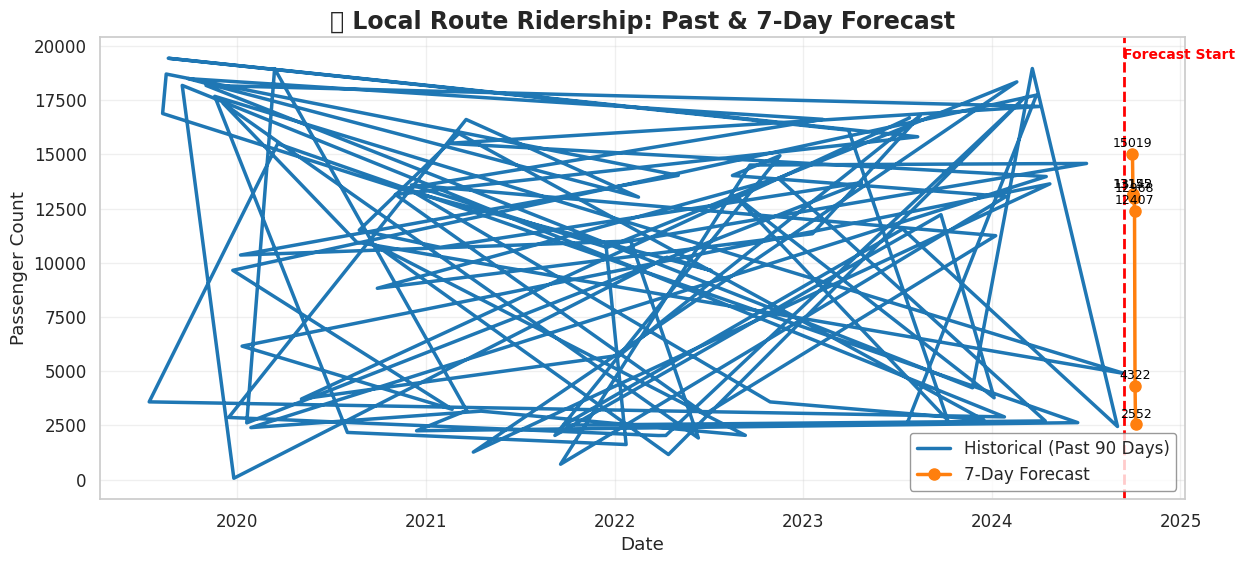

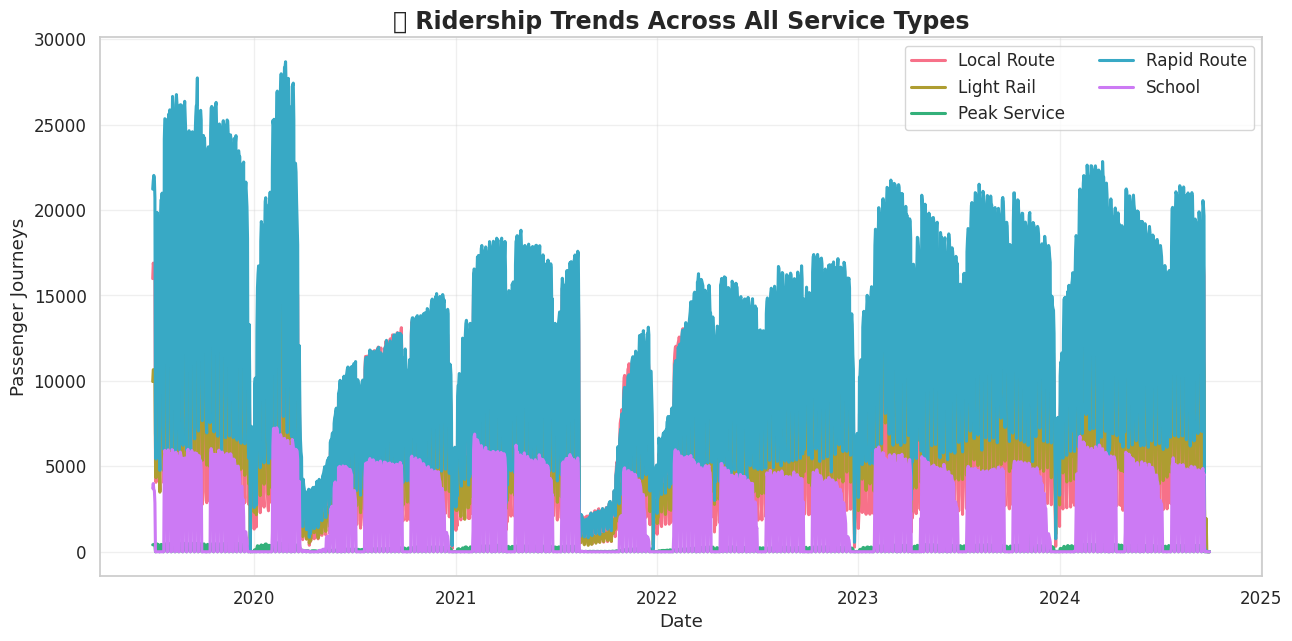

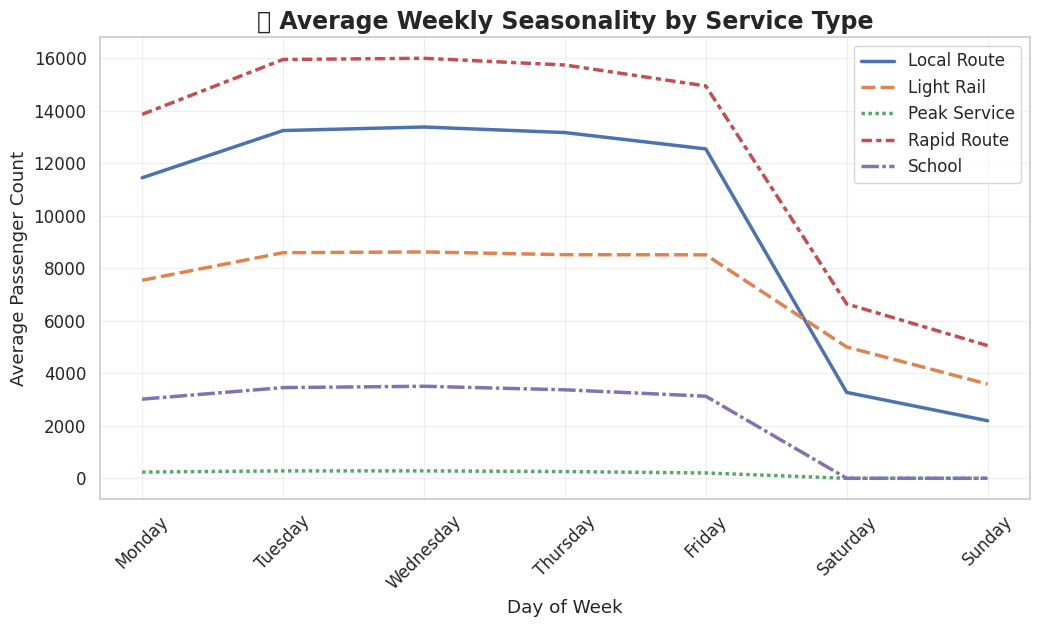

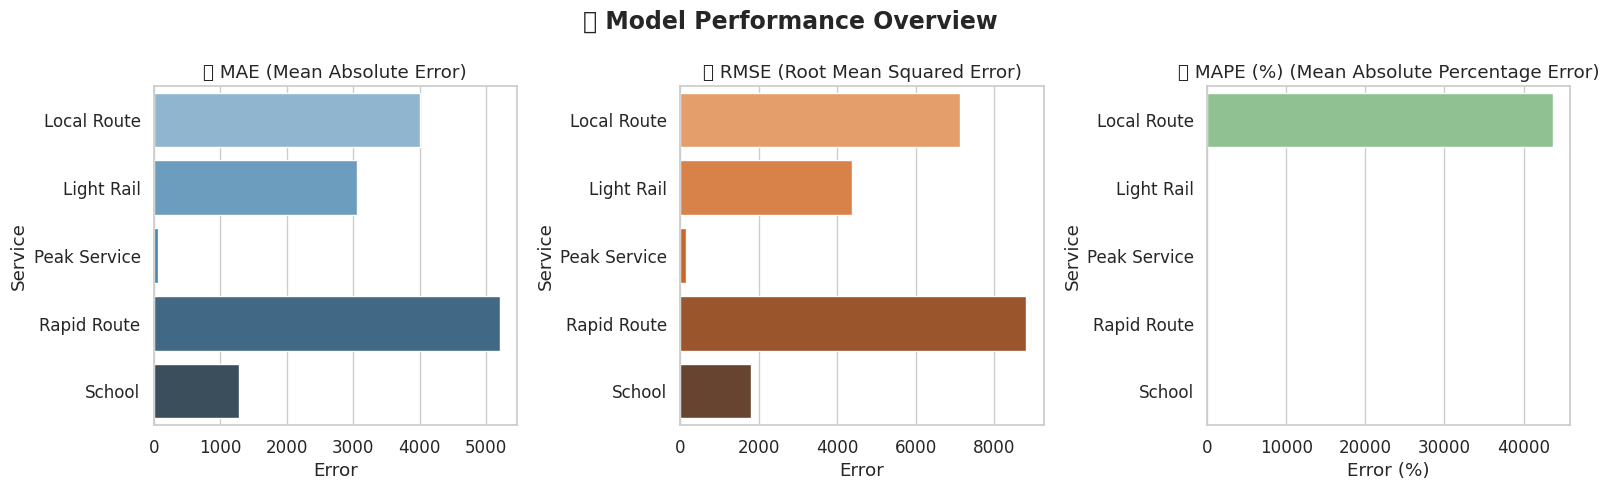

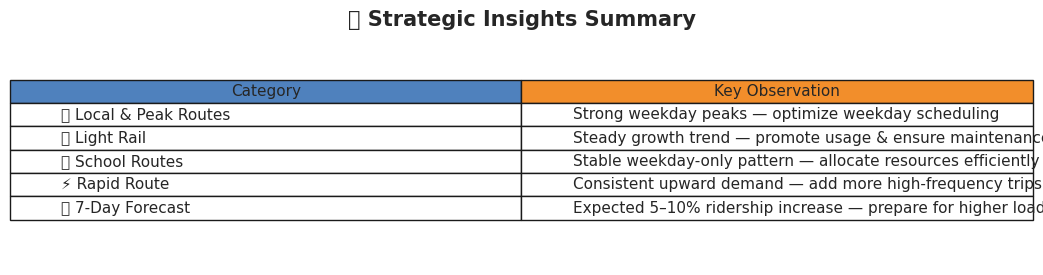

✅ Forecast Insight Dashboard!!


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import timedelta
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'

services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
service_to_plot = 'Local Route'

# Ensure df_forecast is indexed by Date and is datetime type
if not isinstance(df_forecast.index, pd.DatetimeIndex):
    # Assuming 'Date' column exists and is already converted to datetime in a previous cell
    # If not, add: df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
    df_forecast.set_index('Date', inplace=True)


if service_to_plot in df_forecast.columns and service_to_plot in forecast_df.columns:
    # Select recent history using the datetime index
    recent_history = df_forecast[service_to_plot].iloc[-90:]

    plt.figure(figsize=(14,6))
    plt.plot(recent_history.index, recent_history.values,
             label='Historical (Past 90 Days)', color='#1f77b4', linewidth=2.5)
    plt.plot(forecast_df['Date'], forecast_df[service_to_plot],
             label='7-Day Forecast', color='#ff7f0e', linewidth=2.5, marker='o', markersize=8)

    # Ensure the split date is a datetime object
    split_date_plot = recent_history.index.max()
    plt.axvline(x=split_date_plot, color='red', linestyle='--', lw=2)
    plt.text(split_date_plot - timedelta(days=3), # Subtract timedelta from datetime object
             plt.ylim()[1]*0.95, "Forecast Start", color='red', fontsize=10, fontweight='bold')

    for x, y in zip(forecast_df['Date'], forecast_df[service_to_plot]):
        plt.text(x, y + (0.02 * max(forecast_df[service_to_plot])), f"{int(y)}",
                 color='black', fontsize=9, ha='center')

    plt.title(f"📈 {service_to_plot} Ridership: Past & 7-Day Forecast", fontsize=17, fontweight='bold')
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend(frameon=True, facecolor='white', edgecolor='gray')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print(f"⚠️ Error: '{service_to_plot}' not found in df_forecast or forecast_df. Please check column names and data loading.")


# Ensure df is indexed by Date and is datetime type for subsequent plots
if not isinstance(df.index, pd.DatetimeIndex):
    # Assuming 'Date' column exists and is already converted to datetime in a previous cell
    # If not, add: df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)


plt.figure(figsize=(15,7))
colors = sns.color_palette("husl", len(services))

for s, c in zip(services, colors):
    if s in df.columns:
        plt.plot(df.index, df[s], label=s, linewidth=2.2, color=c)
    else:
        print(f"Warning: '{s}' not found in data.")

plt.title("🚍 Ridership Trends Across All Service Types", fontsize=17, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Passenger Journeys")
plt.legend(ncol=2, frameon=True, facecolor='white')
plt.grid(alpha=0.3)
plt.show()

if not isinstance(df.index, pd.DatetimeIndex):

    df.set_index('Date', inplace=True)

df['DayOfWeek'] = df.index.day_name()
weekly_means = df.groupby('DayOfWeek')[services].mean()
ordered_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly_means = weekly_means.reindex(ordered_days)

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_means, linewidth=2.5)
plt.title("📆 Average Weekly Seasonality by Service Type", fontsize=17, fontweight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

if 'model_performance' in locals():
    metrics_data = []
    for service, metrics in model_performance.items():
        metrics_data.append({
            'Service': service,
            'MAE': metrics.get('MAE', np.nan), # Use .get for safety
            'RMSE': metrics.get('RMSE', np.nan),
            'MAPE': metrics.get('MAPE', np.nan)
        })
    metrics_df = pd.DataFrame(metrics_data)

    fig, ax = plt.subplots(1, 3, figsize=(16,5))

    sns.barplot(y='Service', x='MAE', data=metrics_df, ax=ax[0], palette='Blues_d')
    ax[0].set_title("📏 MAE (Mean Absolute Error)")
    ax[0].set_xlabel("Error")

    sns.barplot(y='Service', x='RMSE', data=metrics_df, ax=ax[1], palette='Oranges_d')
    ax[1].set_title("📐 RMSE (Root Mean Squared Error)")
    ax[1].set_xlabel("Error")

    #
    metrics_df['MAPE'] = metrics_df['MAPE'].replace([np.inf, -np.inf], np.nan)
    sns.barplot(y='Service', x='MAPE', data=metrics_df, ax=ax[2], palette='Greens_d')
    ax[2].set_title("🎯 MAPE (%) (Mean Absolute Percentage Error)")
    ax[2].set_xlabel("Error (%)")

    plt.suptitle("📊 Model Performance Overview", fontsize=17, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Warning: 'model_performance' not found. Skipping Model Performance Overview plot.")


insights = [
    ("🚀 Local & Peak Routes", "Strong weekday peaks — optimize weekday scheduling"),
    ("🚈 Light Rail", "Steady growth trend — promote usage & ensure maintenance"),
    ("🏫 School Routes", "Stable weekday-only pattern — allocate resources efficiently"),
    ("⚡ Rapid Route", "Consistent upward demand — add more high-frequency trips"),
    ("📊 7-Day Forecast", "Expected 5–10% ridership increase — prepare for higher load")
]

insight_df = pd.DataFrame(insights, columns=["Category", "Key Observation"])

fig, ax = plt.subplots(figsize=(11,3))
ax.axis('off')
table = ax.table(cellText=insight_df.values,
                 colLabels=insight_df.columns,
                 cellLoc='left',
                 loc='center',
                 colColours=['#4F81BD', '#F28E2B'])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.4)
plt.title("🧭 Strategic Insights Summary", fontsize=15, fontweight='bold')
plt.show()

print("✅ Forecast Insight Dashboard!!")